In [3]:
#Datos sorteos loteria primitiva
import pandas as pd

antiguos = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTov1BuA0nkVGTS48arpPFkc9cG7B40Xi3BfY6iqcWTrMwCBg5b50-WwvnvaR6mxvFHbDBtYFKg5IsJ/pub?gid=0&single=true&output=csv")
modernos = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTov1BuA0nkVGTS48arpPFkc9cG7B40Xi3BfY6iqcWTrMwCBg5b50-WwvnvaR6mxvFHbDBtYFKg5IsJ/pub?gid=1&single=true&output=csv")
sorteos = pd.concat([antiguos,modernos])
sorteos.rename(columns={"COMBINACIÓN GANADORA": "N1","Unnamed: 2": "N2","Unnamed: 3": "N3","Unnamed: 4": "N4","Unnamed: 5": "N5","Unnamed: 6": "N6"},inplace=True)
sorteos.drop(columns={"JOKER","R."},inplace=True)
#Entendemos que si el primer numero de un sorteo no existe es por que no ha habido sorteo, aun que se podriamos comprobar tambien los demas de ser necesario
continuar = True
while continuar:

    borrar = sorteos[sorteos.N1.isna()].index
    if not borrar.empty:
        sorteos.drop(borrar[0],inplace=True)
    else:
        continuar = False
#borrar = sorteos[sorteos.N1.isna()].index
#print(type(borrar))
#print(borrar.isnull())
#sorteos.drop(borrar[0],inplace=True)    
#borrar = sorteos[sorteos.N1.isna()].index
#borrar = sorteos[sorteos.N1.isna()].index

#sorteos.drop(482,inplace=True)
#if any(sorteos[sorteos.N1.isna()]:
#    borra = sorteos.N1.isna()
#    sorteos.drop(borra[0],inplace=True)
sorteos.isna().sum()
#sorteos.N1.isna()
#sorteos.isnull().any()

C:\Users\Feito\AppData\Local\Temp\ipykernel_23760\4206358432.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


FECHA    0
N1       0
N2       0
N3       0
N4       0
N5       0
N6       0
COMP.    0
dtype: int64

CAMBIAMOS LOS TIPOS DE LAS COLUMNAS

In [4]:
sorteos["FECHA"] = pd.to_datetime(sorteos["FECHA"])
sorteos["N1"] = sorteos["N1"].astype(int)
sorteos["N2"] = sorteos["N2"].astype(int)
sorteos["N3"] = sorteos["N3"].astype(int)
sorteos["N4"] = sorteos["N4"].astype(int)
sorteos["N5"] = sorteos["N5"].astype(int)
sorteos["N6"] = sorteos["N6"].astype(int)
sorteos["COMP."] = sorteos["COMP."].astype(int)
#sorteos.dtypes

C:\Users\Feito\AppData\Local\Temp\ipykernel_23760\2586636058.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sorteos["FECHA"] = pd.to_datetime(sorteos["FECHA"])


In [49]:
valores_repetidos_1 = sorteos['N1'].value_counts()
valores_repetidos_2 = sorteos['N2'].value_counts()
valores_repetidos_3 = sorteos['N3'].value_counts()
valores_repetidos_4 = sorteos['N4'].value_counts()
valores_repetidos_5 = sorteos['N5'].value_counts()
valores_repetidos_6 = sorteos['N6'].value_counts()
valores_repetidos_comp = sorteos['COMP.'].value_counts()
print(type(valores_repetidos_1))
      
apariciones_num = pd.concat([valores_repetidos_1,valores_repetidos_2,valores_repetidos_3,valores_repetidos_4,valores_repetidos_5,valores_repetidos_6,valores_repetidos_comp], axis=1, sort=True).sum(axis=1)
apariciones_num = apariciones_num.astype(int)
apariciones_num=apariciones_num.sort_values(ascending=False)
#print(apariciones_num)
print(apariciones_num.index[3], apariciones_num[3])
print (apariciones_num.index[2], apariciones_num[2])

<class 'pandas.core.series.Series'>
45 577
38 536


Text(0.5, 1.0, 'Numeros mas extrtaidos')

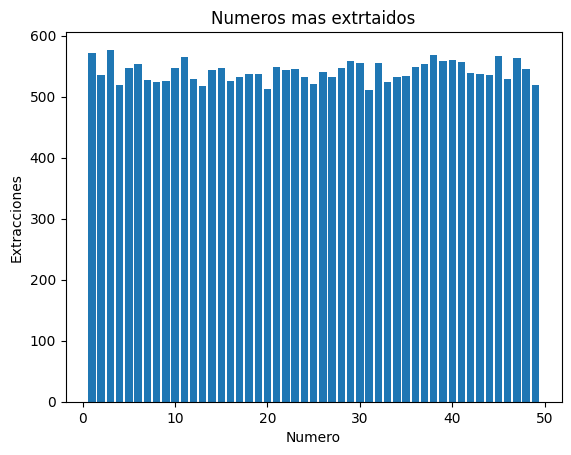

In [28]:
import matplotlib.pyplot as plt
plt.bar(apariciones_num.index,apariciones_num.values)
plt.xlabel("Numero")
plt.ylabel("Extracciones")
plt.title("Numeros mas extrtaidos")